# NEAT Genomes Analysis

In [2]:
import pickle
import neat
import graphviz
import os

## Load genomes

In [15]:
results_path = os.path.abspath("/Users/lorenzoleuzzi/Library/CloudStorage/OneDrive-UniversityofPisa/lifelong evolutionary swarms/results/seed3")

path = f"{results_path}/gd_3seed2_neat_800_500_100_5_30_u_3_drift34/best_genome.pkl"
with open(path, "rb") as f:
    winner1 = pickle.load(f)
path = f"{results_path}/gd_3seed2_neat_800_500_100_5_30_u_3/best_genome.pkl"
with open(path, "rb") as f:
    prev_winner1 = pickle.load(f)
path = f"{results_path}/gd_3seed0_neat_800_500_100_5_30_u_3_drift34/best_genome.pkl"
with open(path, "rb") as f:
    winner2 = pickle.load(f)
path = f"{results_path}/gd_3seed0_neat_800_500_100_5_30_u_3/best_genome.pkl"
with open(path, "rb") as f:
    prev_winner2 = pickle.load(f)

In [17]:
# load config
config_path = "../config-feedforward.txt"
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

## Visualize genomes

In [23]:
config.compatibility_weight_coefficient = 0.6
config.compatibility_disjoint_coefficient = 1.0
prev_winner1.distance(winner1, config), prev_winner2.distance(winner2, config), winner1.distance(winner2, config), prev_winner1.distance(prev_winner2, config)

(0.8357668472240709, 1.425608686993822, 2.6963714122034137, 2.633072571110826)

In [6]:
def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    # if graphviz is None:
    #     warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
    #     return

    # If requested, use a copy of the genome which omits all components that won't affect the output.
    if prune_unused:
        genome = genome.get_pruned_copy(config.genome_config)

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    used_nodes = set(genome.nodes.keys())
    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)

    return dot

In [7]:
def print_genome_structure(genome):
    print(f"Genome ID: {genome.key}")
    
    # Print nodes
    print("\nNodes:")
    for node_id, node in genome.nodes.items():
        print(f"  Node {node_id}: {node}")
    
    # Print connections
    print("\nConnections:")
    for connection in genome.connections.values():
        print(f" {connection}")

Size is 'complexity': (number of nodes, number of enabled connections)

In [8]:
print(len(winner1.nodes), sum(1 for cg in winner1.connections.values() if cg.enabled))
print(winner1.size())
print(len(winner1.connections))

5 58
(5, 58)
69


In [13]:
print_genome_structure(winner1), winner1.size()

Genome ID: 46232

Nodes:
  Node 0: DefaultNodeGene(key=0, bias=-2.4334103610679336, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1: DefaultNodeGene(key=1, bias=-0.20575507101995572, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 2: DefaultNodeGene(key=2, bias=-0.9634450184452346, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1141: DefaultNodeGene(key=1141, bias=1.2798196081954298, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1283: DefaultNodeGene(key=1283, bias=0.6000897828450642, response=1.0, activation=neat_sigmoid, aggregation=sum)

Connections:
 DefaultConnectionGene(key=(-20, 2), weight=0.7477111915037973, enabled=False)
 DefaultConnectionGene(key=(-21, 2), weight=1.4170848118447539, enabled=True)
 DefaultConnectionGene(key=(-44, 2), weight=-2.766070627816706, enabled=True)
 DefaultConnectionGene(key=(-9, 2), weight=-1.4880880160554932, enabled=True)
 DefaultConnectionGene(key=(-40, 1), weight=3.3108119340764386

(None, (5, 58))

In [14]:
print_genome_structure(winner2), winner2.size()

Genome ID: 70403

Nodes:
  Node 0: DefaultNodeGene(key=0, bias=-3.431227008420997, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1: DefaultNodeGene(key=1, bias=2.0238861237893944, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 2: DefaultNodeGene(key=2, bias=-0.5734531902835335, response=1.0, activation=neat_sigmoid, aggregation=sum)

Connections:
 DefaultConnectionGene(key=(-31, 1), weight=-0.9434874633350888, enabled=False)
 DefaultConnectionGene(key=(-6, 1), weight=0.8362266481244568, enabled=True)
 DefaultConnectionGene(key=(-4, 1), weight=0.18060161121396545, enabled=True)
 DefaultConnectionGene(key=(-5, 1), weight=0.03771441298305733, enabled=True)
 DefaultConnectionGene(key=(-1, 1), weight=-2.028316372726947, enabled=True)
 DefaultConnectionGene(key=(-18, 1), weight=2.9505377788611935, enabled=True)
 DefaultConnectionGene(key=(-33, 1), weight=-2.069878273484916, enabled=False)
 DefaultConnectionGene(key=(-13, 1), weight=-5.0, enabled=True)
 Defaul

(None, (3, 52))

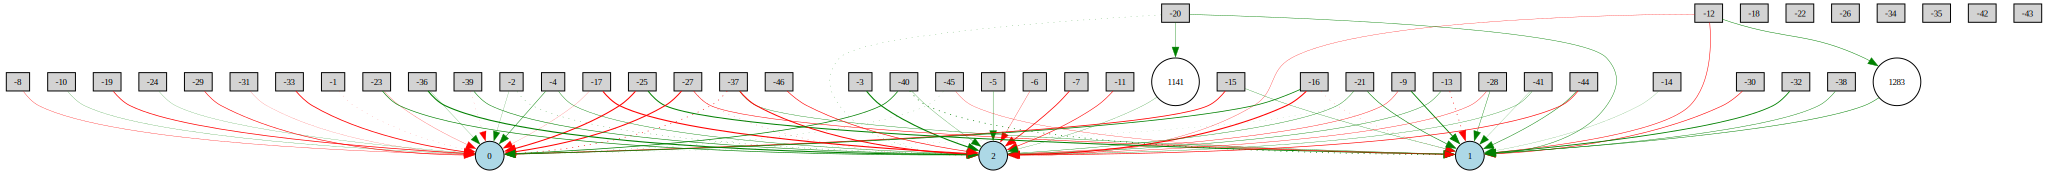

In [11]:
draw_net(config, winner1)

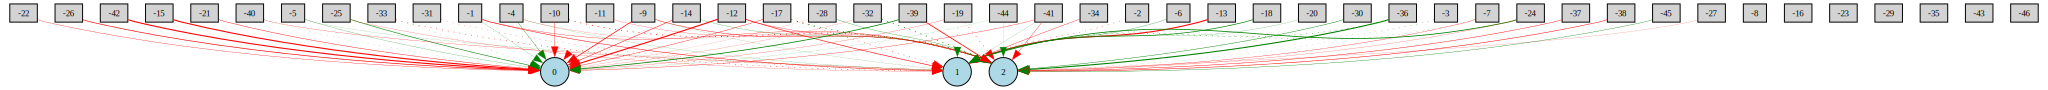

In [12]:
draw_net(config, winner2)

## Regularizations

### Genetic distance

An approximate measure of the difference between genomes, used in dividing the population into species.

In [41]:
config.compatibility_weight_coefficient = 0.6
config.compatibility_disjoint_coefficient = 1.0
distance_lambda = 0.5
distance_penalty = winner1.distance(winner2, config)
distance_penalty, distance_lambda * distance_penalty

(2.6898387336141223, 1.3449193668070611)

# TODO: add wp